# Biodiversity in National Parks

## Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

## Data

This project has two data sets that came with the package. The first csv file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Importing Libraries

In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import utils
from scipy.stats import chi2_contingency


%matplotlib inline

In [77]:
obs_df = pd.read_csv("observations.csv")
species_df = pd.read_csv('species_info.csv')

## Data Wrangling

In this section, I will apply some Data wrangling techniques to fill null values and deal with duplicate values. Furthermore, I will merge the two csv files together to ensure the quicker speed of analysis. 

In [78]:
utils.eda(obs_df)


Rows: 23296 	 Columns: 3

Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 30
Percentage dupe rows: 0.13%

scientific_name    object
park_name          object
observations        int64
dtype: object
-----


The head of the dataframe is: 


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85



The tail of the dataframe is:


,scientific_name,park_name,observations
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171
23295,Cucurbita pepo,Yosemite National Park,164



Description of the numerical columns is as follows


,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [79]:
print("The different number of scientific names are : "+ str(obs_df['scientific_name'].nunique()))
print('The different parks where observations are recorded are : ' + str(obs_df['park_name'].unique()))
print("The total number of observations in this dataset is : " + str(obs_df['observations'].sum()))

The different number of scientific names are : 5541
The different parks where observations are recorded are : ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
The total number of observations in this dataset is : 3314739


In [80]:
utils.eda(species_df)


Rows: 5824 	 Columns: 4

Total null rows: 5633
Percentage null rows: 96.72%

Total duplicate rows: 0
Percentage dupe rows: 0.0%

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
-----


The head of the dataframe is: 


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN



The tail of the dataframe is:


,category,scientific_name,common_names,conservation_status
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN
5823,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN



Description of the numerical columns is as follows


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [81]:
print("The different species of each organism recorded is :" + str(species_df['category'].unique()))
print("The different number of scientific names are : "+ str(species_df['scientific_name'].nunique()))
print("The different number of common names are : "+ str(species_df['common_names'].nunique()))
print("The different categories of conservation status for each organism recorded is :" + str(species_df['conservation_status'].unique()))

The different species of each organism recorded is :['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
The different number of scientific names are : 5541
The different number of common names are : 5504
The different categories of conservation status for each organism recorded is :[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


As can be seen from the code above and my inital exploration of the species_df, there are a large amount of null rows. 97% of the species_df is made up of null rows.

In [82]:
species_df.isna().sum()/species_df.shape[0]*100

category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64

As can be seen that all the null rows are part of the conservation status data. In this case I would explore the data to determine a method of imputing these null values, however, given that the data in this column refers to conservation status I am able to make the conclusion that NaN values refer to organisms that are in no harm. 

In [83]:
species_df.fillna('No Intervention', inplace=True)

In [84]:
#Sanity Check
species_df.isna().sum()

category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64

In [85]:
species_df['conservation_status'].value_counts()

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

I finally want to combine the two dataframes together, given I have the common column of scientific name I can merge the two dataframes with this column. 

In [86]:
final_df = pd.merge(obs_df,species_df,on='scientific_name')

In [87]:
final_df.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,No Intervention
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,No Intervention
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,No Intervention
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Klamath Plum,No Intervention


## Analysis

In this section, I will use descriptive statistics and data visualisation techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks

### Park analysis

First, I want to explore whether the park had an effect on the number of observations.

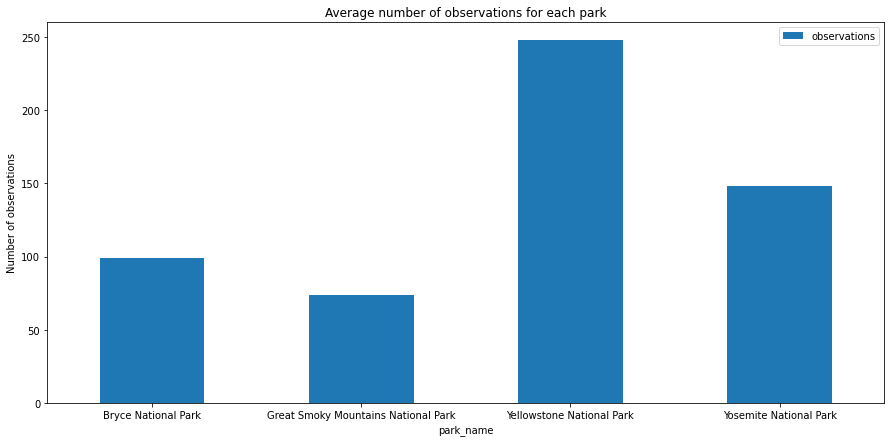

In [88]:
final_df.groupby('park_name').mean().plot(kind='bar',figsize = (15,7))
plt.xticks(rotation = 0)
plt.ylabel("Number of observations")
plt.title("Average number of observations for each park")
plt.show()

Yellowstone National park seems to have the highest number of observations on average compared to the other three parks. Given that this is the biggest out of the four, that seems to make a lot of sense. I want to explore this further, to see the distribution of species observed in each park.

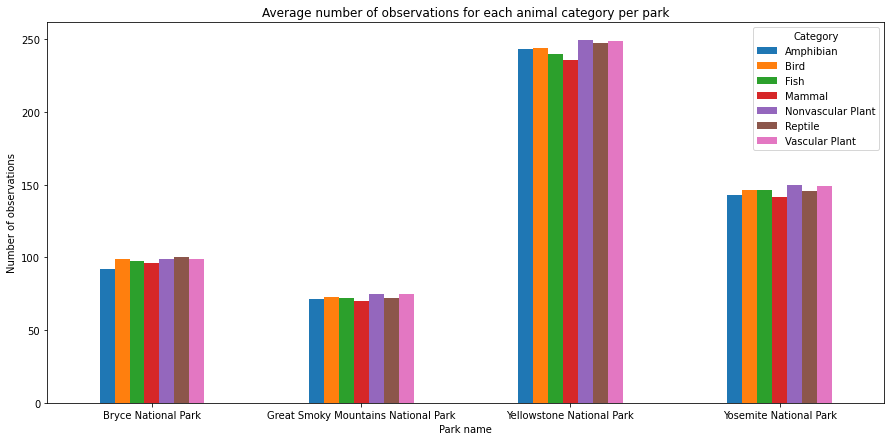

In [89]:
final_df.groupby(['park_name','category'])['observations'].mean().unstack().plot(kind='bar',figsize = (15,7))
plt.xticks(rotation=0)
plt.title("Average number of observations for each animal category per park")
plt.xlabel("Park name")
plt.ylabel('Number of observations')
plt.legend(title='Category')
plt.show()

The bar plot above demonstrates some valuable insights.

- Non-Vascular plants average across all the parks seem to be observed the most. This could be down to a multitude of reasons such as easy access or much more identifiable. Given that animals are able to hide and run away from observers meanwhile plants are rooted into the ground it makes sense that non-vascular plants are recorded the most. 
- Yellowstone national park has the highest number of observations across all the parks. From external research it is clear to see that Yellowstone is one of the biggest national parks in USA and will contain a higher number of species which is represented by the plot above. 
- Great smoky mountains park has the lowest count of animals on average due to the park being smaller than its counterparts.
- In nearly all the parks, mammals on average have the lowest count. This is very interesting because I would have expected to reptiles or fish would have been harder to observe. This could have been due to the fact that mammals are able to escape easier when observers are nearby.

### Conservation Status

In this section I want to explore the data on conservation status. There are 5 categories for conservation status with the largest proportion of the data in this column being no intervention. As you can see below, 24752 rows of data are 'no intervention' - which makes up 96% of the dataframe.

In [90]:
print("The count of the no intevention is : " + str(final_df['conservation_status'].value_counts()[0]))

The count of the no intevention is : 24752


Given that no intervention has the highest count, I have chosen to omit it from the plots below as it would diminish the visualisation of the other conservation status categories.

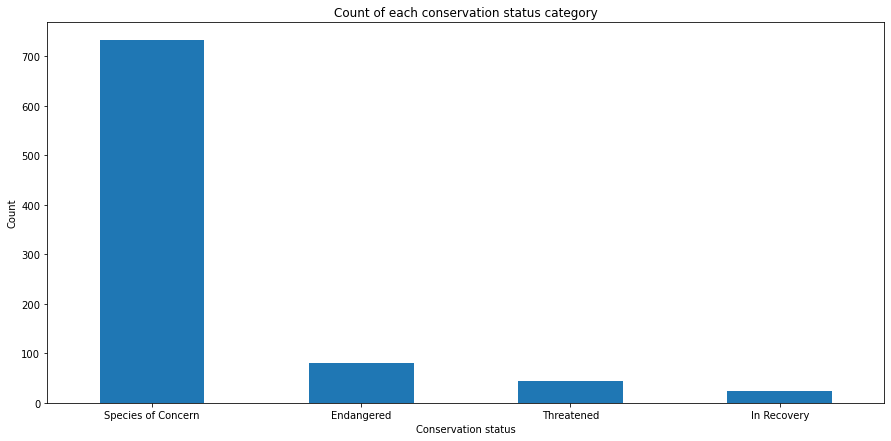

In [91]:
final_df['conservation_status'].value_counts()[1:].plot(kind = 'bar',figsize = (15,7))
plt.title("Count of each conservation status category")
plt.xticks(rotation=0)
plt.xlabel("Conservation status")
plt.ylabel("Count")
plt.show()

The next highest conservation status category is 'species of concern' which is very good to see - we don't want a high count of endangered animals! I want to explore further whether conservation status has effect on the number of observations that are made.

In this scatter plot below, you can't see much given the sheer amount of 'no intervention' data. But there is something that is quite strange, around 200 observations there seems to be a gap. Upon further exploration of the data it could be down to a multitude of reasons - but my best guess is that there has been an error in the data which has been inputted in the data frame. 

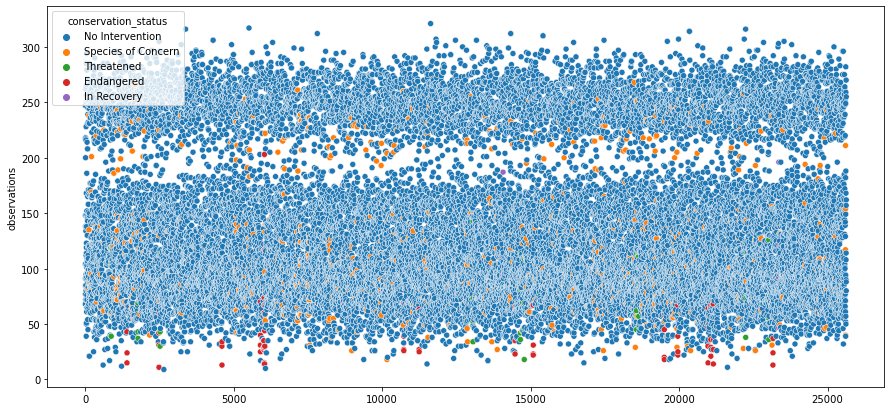

In [92]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=final_df,x=final_df.index,y='observations',hue='conservation_status')
plt.show()

With the 'no intervention' data omitted from the scatter plot, it is hard to make a strong insight. But it can be determined that the more endangered or threatened a species is, the less likely they are to be observed frequently. Which is to be expected given that endangered and threatened species are less frequent. 

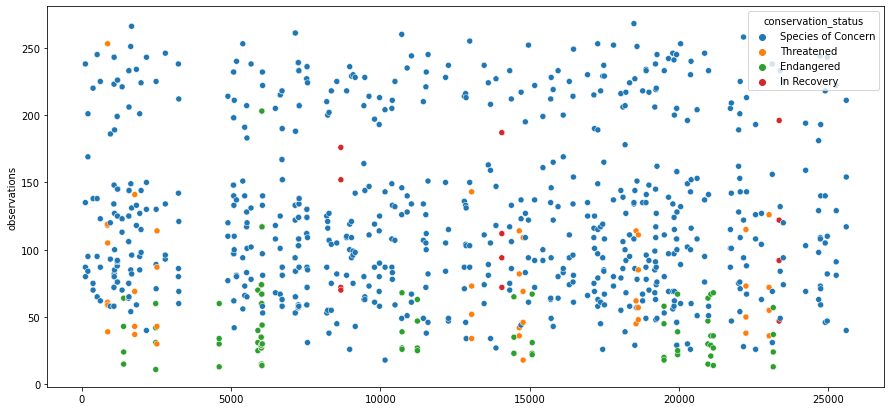

In [93]:
no_non_intervention = final_df[final_df['conservation_status']!='No Intervention']
plt.figure(figsize=(15,7))
sns.scatterplot(data=no_non_intervention,x=no_non_intervention.index,y='observations',hue='conservation_status')
plt.show()

<Figure size 1080x504 with 0 Axes>

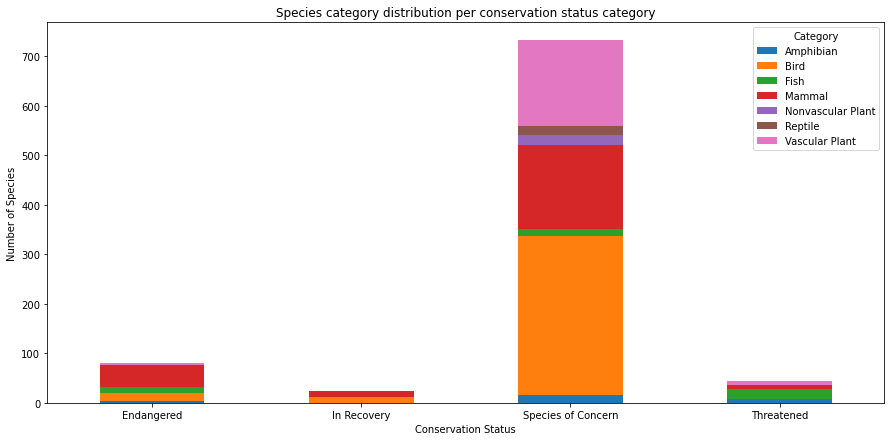

In [94]:
conservationCategory = no_non_intervention.groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()


plt.figure(figsize = (15,7))
conservationCategory.plot(kind = 'bar', figsize=(15,7),stacked=True)
plt.xlabel("Conservation Status")
plt.title("Species category distribution per conservation status category")
plt.xticks(rotation = 0)
plt.legend(title='Category')
plt.ylabel("Number of Species")
plt.show()

Looking at the distribution of species per conservation status category. 

- It seems that mammals are highly endangered compared to other species which is to be expected with increased human activity and climate change - these mammals are finding it harder to eat within parks due to the whole ecosystem being affected by humans. 
- Fish seem to be threatened which is to be expected given climate change and again due to a lack of food. 
- On the other hand, reptiles seem to be affected the least. This could be due to many reasons but one that seems to be coming up from external research is the fact that these animals are cold-blooded and the slight raise in temperatures is helping them to operate better and catch their prey. 

### Ceratin types of species more likely to be endangered than others

Following on from the analysis conducted earlier, I want to explore the endangered data even further. I want to determine whether there are certain species that are more prone to being endangered compared with others.

I have created some functions that have sped up this anaylsis process and will be imported from my utils library. Firstly, I want to determine whether the species observed is being protected or not. If the species' conservation status is "no intervention" then it is protected, if it any of the other categories it is not. 

In [98]:
final_df['is_protected'] = final_df['conservation_status'].apply(lambda x: utils.protected(x))

Once the new column is created, group by category and is_protected to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [59]:
protected_or_not = final_df.groupby(['category','is_protected']).scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='is_protected',index='category',values='scientific_name')\
    .reset_index()\
    .rename_axis(None, axis=1)

protected_or_not.rename(columns = {False:'not_protected',True:'is_protected'},inplace = True)

protected_or_not

,category,not_protected,is_protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each category exhibits in the data. From this analysis, we can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds. 

In [60]:
protected_or_not['percentage_protected'] = round((protected_or_not['is_protected']/(protected_or_not['not_protected']+protected_or_not['is_protected']))*100,2)

protected_or_not

,category,not_protected,is_protected,percentage_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


I want to determine if there is a statistical significance of the species of animal, I have decided to choose the top 4 species with the highest percentage protected - Bird, Amphibian, Fish and Mammal.

In [61]:
chi_sq = protected_or_not[(protected_or_not['category']=='Bird')|(protected_or_not['category']=='Amphibian')|(protected_or_not['category']=='Fish')|(protected_or_not['category']=='Mammal')]

chi_sq

,category,not_protected,is_protected,percentage_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05


The following lines of code return the chi-squared test values for each of the combinations of the four species.

In [108]:
start_index = 0
second_index = 1

while True:
    species_values = []
    first = []
    second = []
    for i in chi_sq.iloc[start_index][['not_protected','is_protected']].values:
        first.append(i)
    for i in chi_sq.iloc[second_index][['not_protected','is_protected']].values:
        second.append(i)
    species_values.append(first)
    species_values.append(second)
    print("The P value for "+str(chi_sq['category'].iloc[start_index]+" and "+str(chi_sq['category'].iloc[second_index])))
    print(chi2_contingency(species_values)[1])
    if second_index == 3 and start_index == 2:
        break
    else:
        second_index +=1
    if second_index > len(chi_sq)-1:
        start_index += 1
        if start_index > len(chi_sq)-1:
            break
        else:
            second_index = start_index + 1
    

The P value for Amphibian and Bird
0.17593613249594683
The P value for Amphibian and Fish
1.0
The P value for Amphibian and Mammal
0.12757669693198975
The P value for Bird and Fish
0.07668199569057194
The P value for Bird and Mammal
0.6875948096661336
The P value for Fish and Mammal
0.0561483484489001


A p value demonstrates the statistical significance between two sets of data. The null hypothesis is that the two sets of data are independent of each other and not statistically significant if the p value is less than 0.05. 

Looking at the data some of the p values are slightly above 0.05, but none are below the threshold value demonstrating that there is no statistical significance demonstrating none of the top four protected groups have a higher statistical significance of being protected compared to others. 

I wanted to explore this further, for the top four protected species - I want to see the animal that is observed the most and its distribution of protection per park. For mammals, it seems that bats are recorded the most.

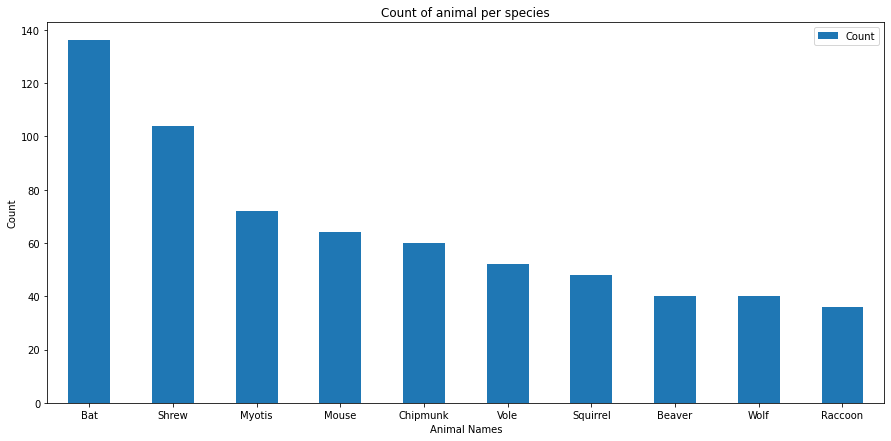

In [110]:
mammal_names = final_df[final_df['category']=='Mammal']['common_names'].tolist()
mammal_names = utils.one_value(mammal_names)
mammal_names = utils.general_name(mammal_names)
utils.plot_count(mammal_names)

With the help of regex, I was able to find when the word came up in the common names. As expected the highest distribution of bats observed is at Yellowstone, with more bats being protected at Yellowstone than not. However, it seems that in the Great smoky mountains national park they are less likely to be protected. 

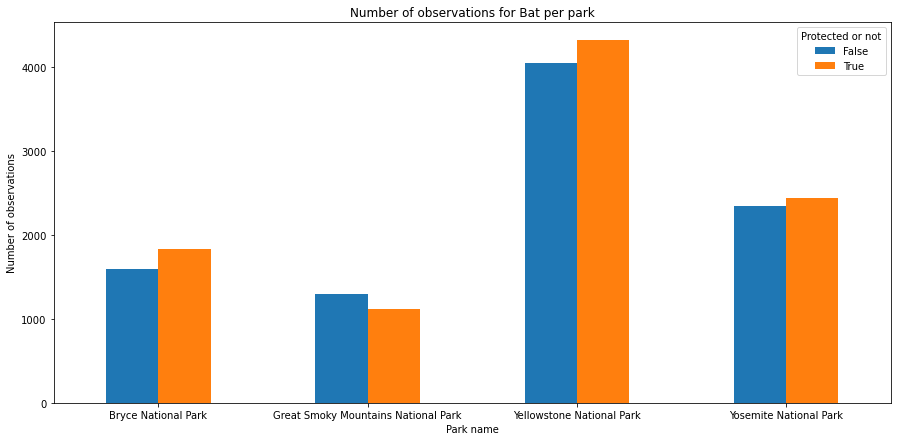

In [111]:
animal_df = final_df[final_df.common_names.str.contains(r"\bBat\b", regex = True)]
utils.observation_per_park("Bat", animal_df)

Following the same procedure as before, it seems that the Salamander was the highest recorded amphibian. 

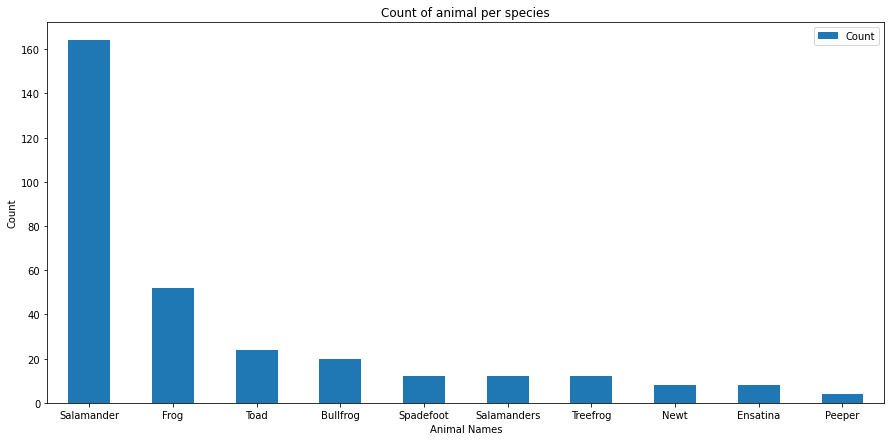

In [112]:
amp = final_df[final_df['category']=='Amphibian']['common_names'].tolist()
amp = utils.one_value(amp)
amp = utils.general_name(amp)
utils.plot_count(amp)

What is incredibly surprising is that although they are observed the most out of all amphibians, Salamanders seem to have a very low protection rate. Again the the distribution per park is as expected. Given that this the most recorded this distribution would be represented for other amphibians. 

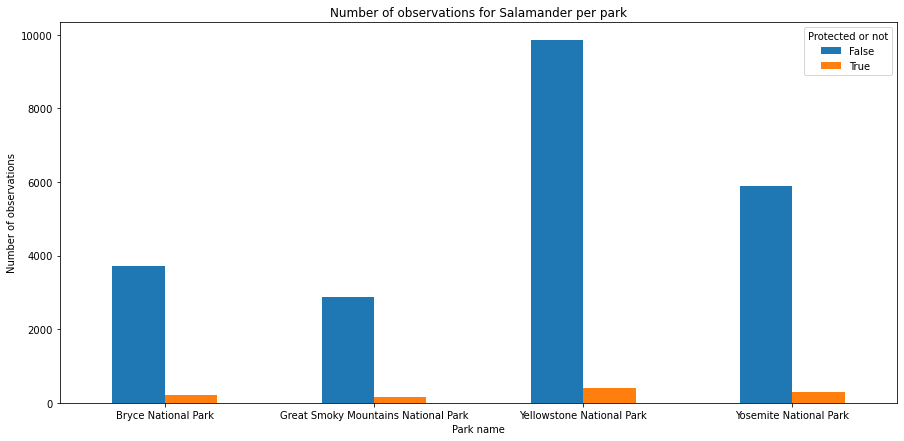

In [113]:
animal_df = final_df[final_df.common_names.str.contains(r"\bSalamander\b", regex = True)]
utils.observation_per_park("Salamander", animal_df)

The warbler is the highest recorded bird.

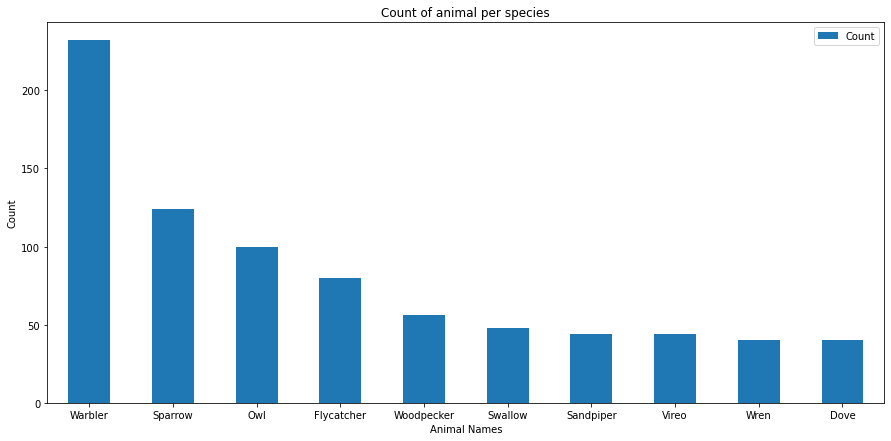

In [114]:
bird = final_df[final_df['category']=='Bird']['common_names'].tolist()
bird = utils.one_value(bird)
bird = utils.general_name(bird)
utils.plot_count(bird)

Again, it seems that birds are not heavily protected which again is surprising to see. The number of observations is much higher than amphibians which is to be expected given that you can observe birds in flight or in trees. 

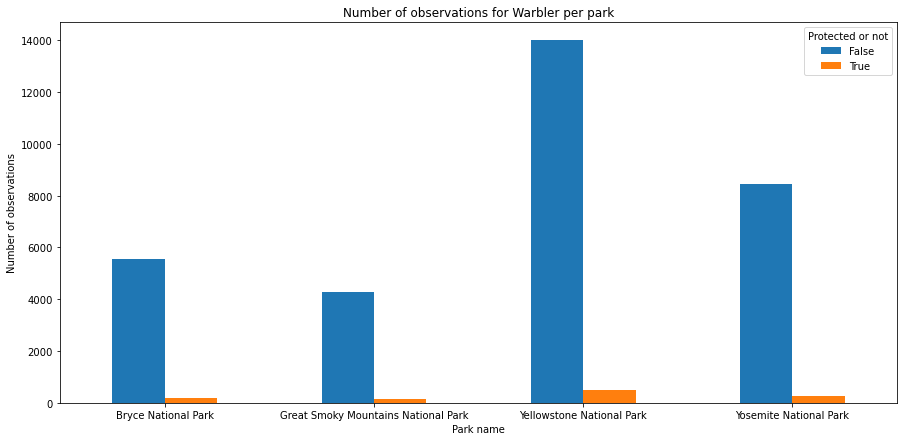

In [115]:
animal_df = final_df[final_df.common_names.str.contains(r"\bWarbler\b", regex = True)]
utils.observation_per_park("Warbler", animal_df)

The Shiner is the most observed fish, closely followed by the Dart.

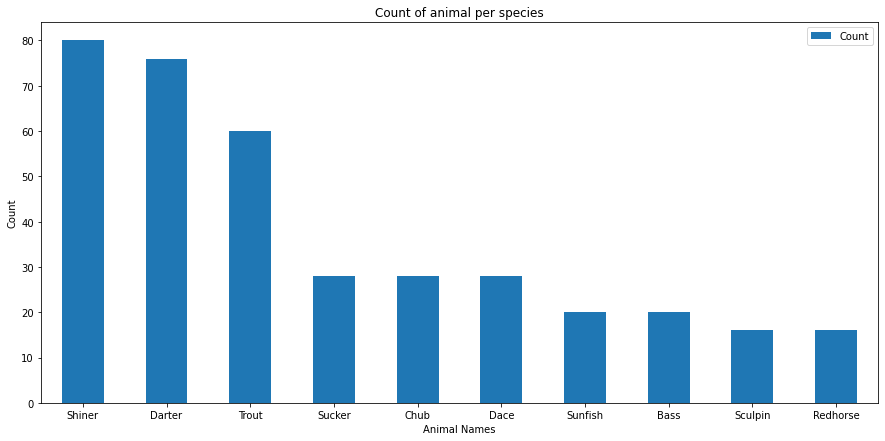

In [116]:
fish = final_df[final_df['category']=='Fish']['common_names'].tolist()
fish = utils.one_value(fish)
fish = utils.general_name(fish)
utils.plot_count(fish)

It seems that fish as a whole are not protected at all. This is incredulous given that high number of fish that are endangered or threatened. With climate change and humans destroying the sea environment this is a massive cause for concern. 

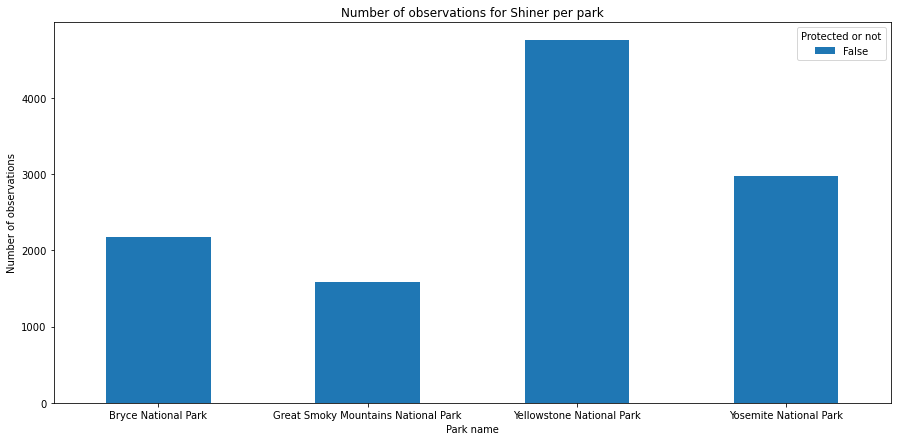

In [117]:
animal_df = final_df[final_df.common_names.str.contains(r"\bShiner\b", regex = True)]
utils.observation_per_park("Shiner", animal_df)

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - There seems to be very little statistical significance between groups of animals
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.
    - fish as a whole species are not protected and measures need to be put in place for their protection 
    - birds and amphibians are protected but in very low rates, their protection needs to be increased.

## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 